This is a Zomato delivery dataset

my Aim:
to find the factors that have a significant impact on delivery of Food
and predict the time required for a delivery


import pandas as pd

In [81]:
df=pd.read_csv('data/finalTrain.csv')

In [82]:

df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [83]:
# checking for datatype in dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [84]:
#checking for null value in dataset
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [85]:
df.shape

(45584, 20)

In [86]:
# we create a copy of data to make sure original data is not altered in our analysis
df1=df

In [87]:
#to check if there are any duplicate rows
df1.duplicated().sum()

0

In [88]:
# lets drop the id column 
df1=df1.drop('ID',axis=1)

In [89]:
df1.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


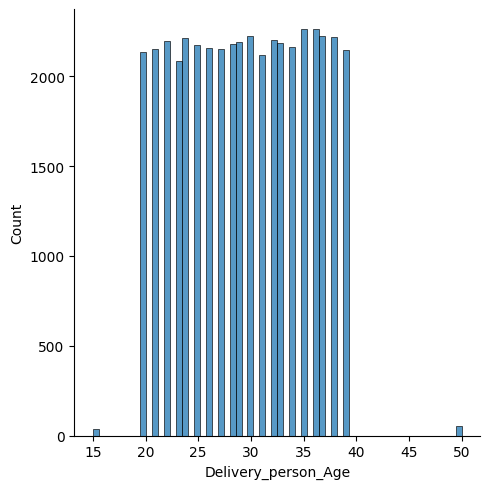

In [90]:
# we are trying to check for outliers so to decide if to fill null  with mean or median
# since there are only 2 outiers median will be a better option . 
import seaborn as sns
sns.displot(df1['Delivery_person_Age'])

In [91]:
# here we replaced all null values with median 
df1['Delivery_person_Age']=df1['Delivery_person_Age'].fillna(df1['Delivery_person_Age'].median())
df1['Delivery_person_Age']=df1['Delivery_person_Age'].astype("int")

<Axes: >

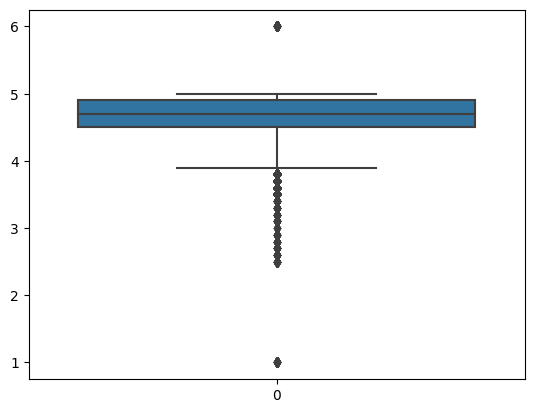

In [92]:
sns.boxplot(df1['Delivery_person_Ratings'])

In [93]:
# here we replaced all null values with median 
df1['Delivery_person_Ratings']=df1['Delivery_person_Ratings'].fillna(df1['Delivery_person_Ratings'].median())

In [94]:

# we will be droping columns time_orderd,time_order_picked,vehicle condition and vehicle type,order timestamp


In [104]:
df1['Time_Orderd'].isnull().sum()

1731

In [96]:
df1['Vehicle_condition'].unique()

array([2, 1, 0, 3], dtype=int64)

In [97]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_ID           45584 non-null  object 
 1   Delivery_person_Age          45584 non-null  int32  
 2   Delivery_person_Ratings      45584 non-null  float64
 3   Restaurant_latitude          45584 non-null  float64
 4   Restaurant_longitude         45584 non-null  float64
 5   Delivery_location_latitude   45584 non-null  float64
 6   Delivery_location_longitude  45584 non-null  float64
 7   Order_Date                   45584 non-null  object 
 8   Time_Orderd                  43853 non-null  object 
 9   Time_Order_picked            45584 non-null  object 
 10  Weather_conditions           44968 non-null  object 
 11  Road_traffic_density         44983 non-null  object 
 12  Vehicle_condition            45584 non-null  int64  
 13  Type_of_order   

In [98]:
df1.sample(10)

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
26479,INDORES04DEL02,36,4.6,22.753659,75.903365,22.773659,75.923365,09-03-2022,09:10,09:25,Cloudy,Low,2,Drinks,scooter,NaN,No,Metropolitian,18
23233,HYDRES17DEL02,36,3.8,17.451976,78.385883,17.531976,78.465883,31-03-2022,19:35,19:40,Stormy,Jam,1,Buffet,motorcycle,1.0,Yes,Metropolitian,39
7737,MYSRES09DEL01,36,4.8,12.323194,76.630583,12.433194,76.740583,16-03-2022,22:10,22:20,Stormy,Low,2,Buffet,scooter,1.0,No,Urban,17
38250,JAPRES20DEL01,31,4.3,26.956431,75.776649,27.026431,75.846649,20-03-2022,19:45,19:50,Fog,Jam,1,Snack,motorcycle,1.0,No,Metropolitian,42
34574,PUNERES20DEL01,38,4.5,18.592718,73.773572,18.632718,73.813572,21-03-2022,15:55,0.666666667,Cloudy,Medium,2,Meal,scooter,1.0,No,Metropolitian,18
24451,JAPRES05DEL01,24,3.3,26.905287,75.794592,26.975287,75.864592,23-03-2022,23:30,23:40,Sunny,Low,1,Buffet,scooter,1.0,No,Metropolitian,42
39795,PUNERES09DEL01,36,4.1,18.536562,73.896485,18.576562,73.936485,26-03-2022,16:35,16:45,Windy,Medium,1,Drinks,scooter,1.0,No,Urban,32
9540,INDORES16DEL03,34,4.5,22.744648,75.894377,22.774648,75.924377,21-03-2022,17:45,17:50,Cloudy,Medium,1,Snack,scooter,1.0,No,Metropolitian,19
27734,MYSRES07DEL02,25,4.4,12.325461,76.632278,12.405461,76.712278,25-03-2022,0.916666667,22:05,Fog,Jam,2,Meal,motorcycle,1.0,No,Metropolitian,35
37246,SURRES09DEL03,36,4.5,21.175975,72.795503,21.235975,72.855503,26-03-2022,17:30,17:45,Sandstorms,Medium,2,Snack,scooter,1.0,No,Metropolitian,25


In [111]:
# since we have total time we can drop this  2 columns
df1=df1.drop(["Time_Orderd",'Time_Order_picked'],axis=1)

In [112]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_ID           45584 non-null  object 
 1   Delivery_person_Age          45584 non-null  int32  
 2   Delivery_person_Ratings      45584 non-null  float64
 3   Restaurant_latitude          45584 non-null  float64
 4   Restaurant_longitude         45584 non-null  float64
 5   Delivery_location_latitude   45584 non-null  float64
 6   Delivery_location_longitude  45584 non-null  float64
 7   Order_Date                   45584 non-null  object 
 8   Weather_conditions           44968 non-null  object 
 9   Road_traffic_density         44983 non-null  object 
 10  Vehicle_condition            45584 non-null  int64  
 11  Type_of_order                45584 non-null  object 
 12  Type_of_vehicle              45584 non-null  object 
 13  multiple_deliver

In [118]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


# using the latitude and longitude data of restaurant and longitude data we find the distance between them 
# here we did not make use of haversine formula as it considers earth as sphere so it has a error rate of 0.5%
# we make use of vincenty distance which is more accurate and present in geopy library. 

In [125]:
 # here we create new column to save the distance between source and destination
from geopy.distance import distance as geodistance
def calculate_distance(lat1, lon1, lat2, lon2):
    point1 = (lat1, lon1)
    point2 = (lat2, lon2)
    return geodistance(point1, point2).km

df1['distance_km'] = df1.apply(lambda row: calculate_distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)




In [127]:
# since we have distance now so we can delete the latitude and longitude of locations 
# df1=df1.drop(columns=['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'])
# i do not think it is necessary so lets keep it for a while now.

array([1.02714640e+01, 6.22937608e+00, 1.37643059e+01, ...,
       5.86614333e+03, 1.98072063e+01, 1.73579146e+04])

In [134]:
# here we convert datatype of order_date to datetime

df1['Order_Date']=pd.to_datetime(df1['Order_Date'],format='%d-%m-%Y')

In [142]:
# change the data type to string
df1['Weather_conditions']=df1['Weather_conditions'].astype('string')

In [144]:
# we fill the null value of this columns with mode.
# here we used mode()[0] since we want the first mode ,as there can be multiple mode to a column.

df1['Weather_conditions'].fillna(df1['Weather_conditions'].mode()[0],inplace=True)

In [147]:
# here we replced main null values with Unknown
df1['Festival'].fillna('Unknown', inplace=True)
df1['Festival']=df1['Festival'].astype('string')

In [150]:
df1['Road_traffic_density'].fillna('Unknown', inplace=True)
df1['Road_traffic_density']=df1['Road_traffic_density'].astype('string')

In [156]:
df1['multiple_deliveries']=df1['multiple_deliveries'].astype("float")
df1['multiple_deliveries'].fillna(df1['multiple_deliveries'].median(),inplace=True)

In [164]:
df1['City'].fillna('Unknown', inplace=True)
df1['City']=df1['City'].astype("string")
df1['City'].unique()

<StringArray>
['Metropolitian', 'Urban', 'Semi-Urban', 'Unknown']
Length: 4, dtype: string

In [173]:
df1['Delivery_person_ID']=df1['Delivery_person_ID'].astype('string')
df1['Type_of_order']=df1['Type_of_order'].astype('string')
df1['Type_of_vehicle']=df1['Type_of_vehicle'].astype('string')

In [174]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_ID           45584 non-null  string        
 1   Delivery_person_Age          45584 non-null  int32         
 2   Delivery_person_Ratings      45584 non-null  float64       
 3   Restaurant_latitude          45584 non-null  float64       
 4   Restaurant_longitude         45584 non-null  float64       
 5   Delivery_location_latitude   45584 non-null  float64       
 6   Delivery_location_longitude  45584 non-null  float64       
 7   Order_Date                   45584 non-null  datetime64[ns]
 8   Weather_conditions           45584 non-null  string        
 9   Road_traffic_density         45584 non-null  string        
 10  Vehicle_condition            45584 non-null  int64         
 11  Type_of_order                45584 non-nu

In [166]:
# so we have handled all null values 

df1.isnull().sum()

Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
distance_km                    0
dtype: int64

In [167]:
# check for duplicate records
df1.duplicated().sum()

0

In [175]:
# lets seprate numerical and categorical columns 
numerical_columns=df1.columns[ df1.dtypes!='string']
categorical_columns=df1.columns[ df1.dtypes=='string']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)', 'distance_km'],
      dtype='object')
Categorical Columns: Index(['Delivery_person_ID', 'Weather_conditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')


In [176]:
df1[categorical_columns].describe()

,Delivery_person_ID,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
count,45584,45584,45584,45584,45584,45584,45584
unique,1320,6,5,4,4,3,4
top,JAPRES11DEL02,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,67,8269,15476,11530,26429,44460,34087


In [177]:
df1['Weather_conditions'].value_counts()

Weather_conditions
Fog           8269
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Sunny         7282
Name: count, dtype: Int64

In [178]:
df1['Road_traffic_density'].value_counts()

Road_traffic_density
Low        15476
Jam        14139
Medium     10945
High        4423
Unknown      601
Name: count, dtype: Int64

In [180]:
df1['Type_of_order'].value_counts()

Type_of_order
Snack     11530
Meal      11456
Drinks    11321
Buffet    11277
Name: count, dtype: Int64

In [181]:
df1['Type_of_vehicle'].value_counts()

Type_of_vehicle
motorcycle          26429
scooter             15273
electric_scooter     3814
bicycle                68
Name: count, dtype: Int64

In [182]:
df1['Festival'].value_counts()

Festival
No         44460
Yes          896
Unknown      228
Name: count, dtype: Int64

In [184]:
df1['City'].value_counts()

City
Metropolitian    34087
Urban            10133
Unknown           1200
Semi-Urban         164
Name: count, dtype: Int64

In [192]:
df1['distance_km']=df1['distance_km'].round(2)
df1['distance_km'].sample(8)

27234     3.03
14974    13.94
44660    16.58
21636     1.55
13953    20.14
27676     9.11
3389      9.20
17340    17.26
Name: distance_km, dtype: float64

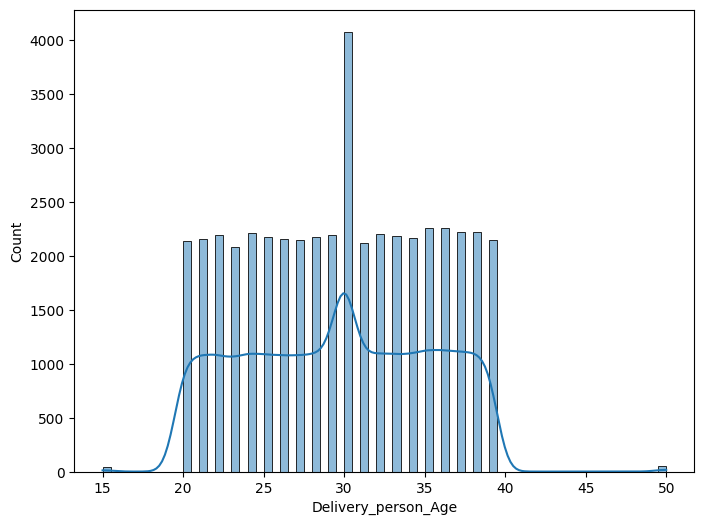

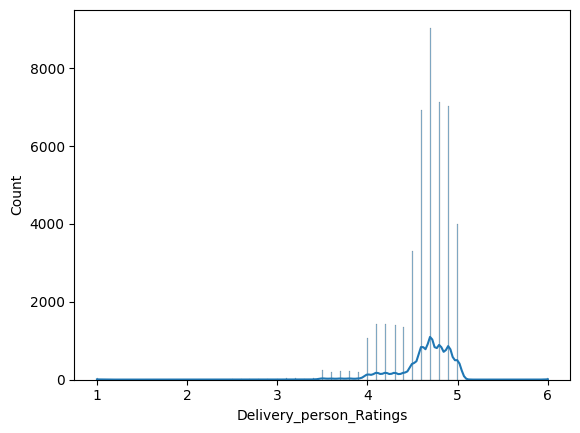

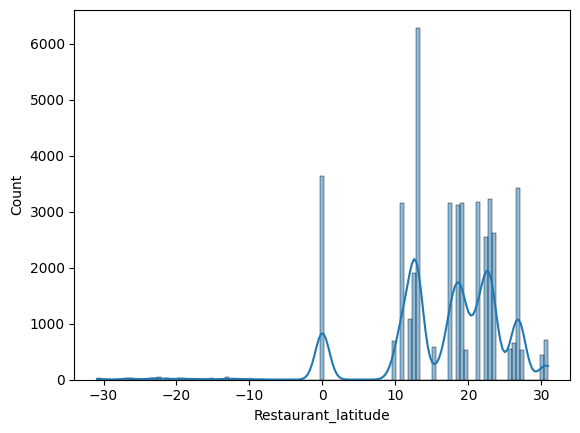

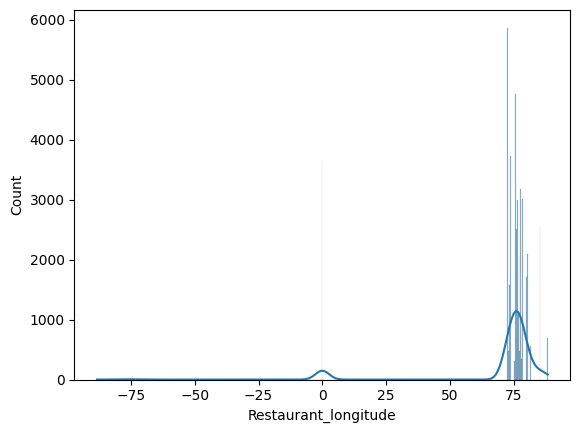

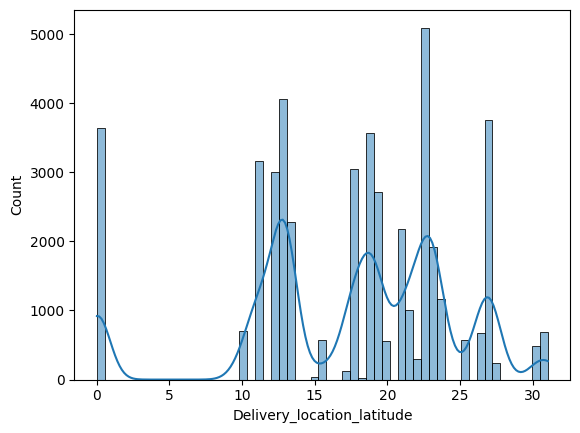

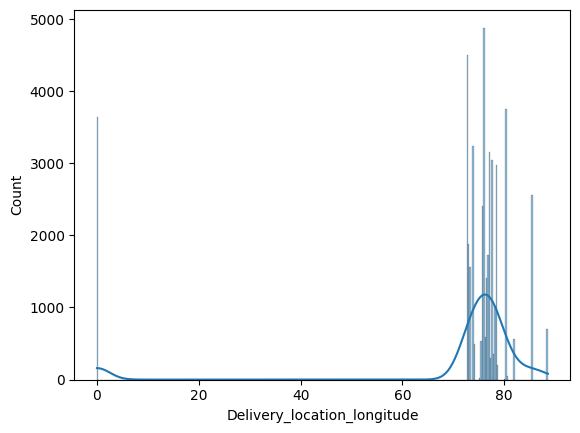

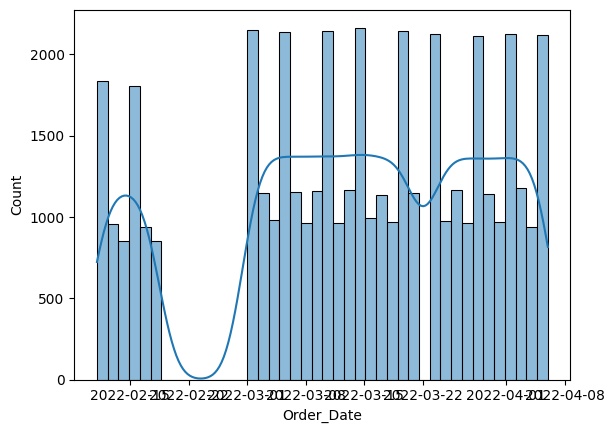

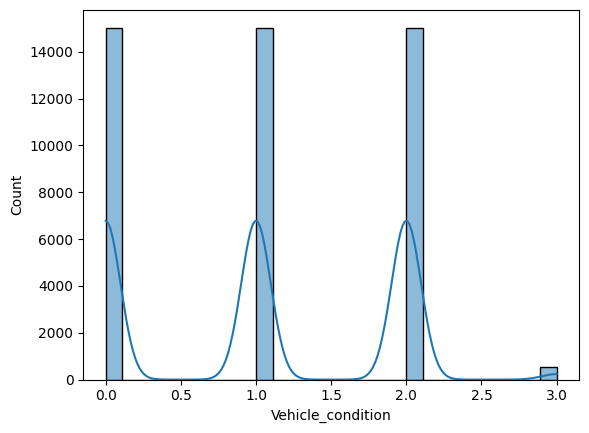

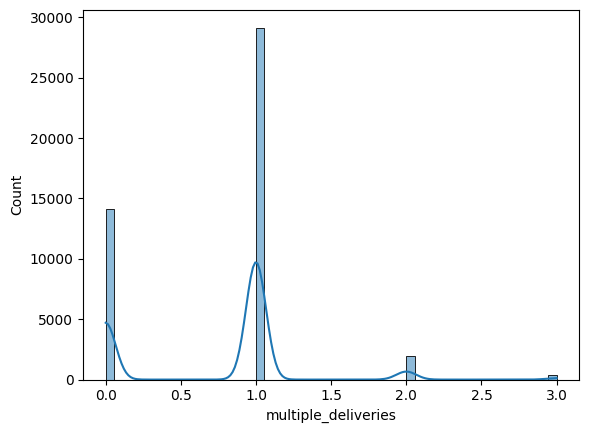

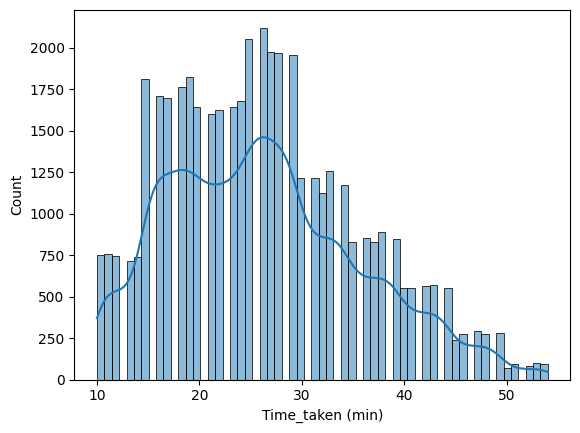

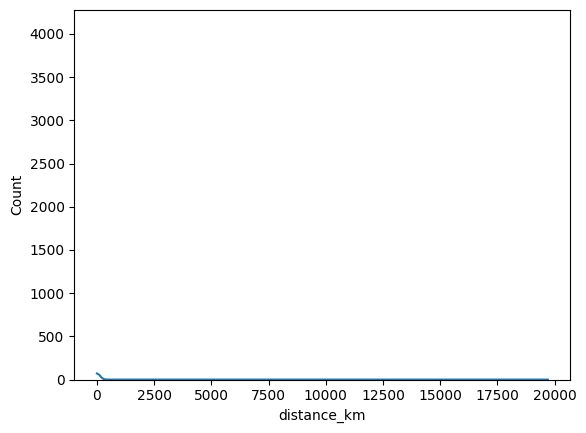

In [195]:
# lets check data distribution for numerical columns
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df1,x=i,kde=True)
    print('\n')
    plt.show()

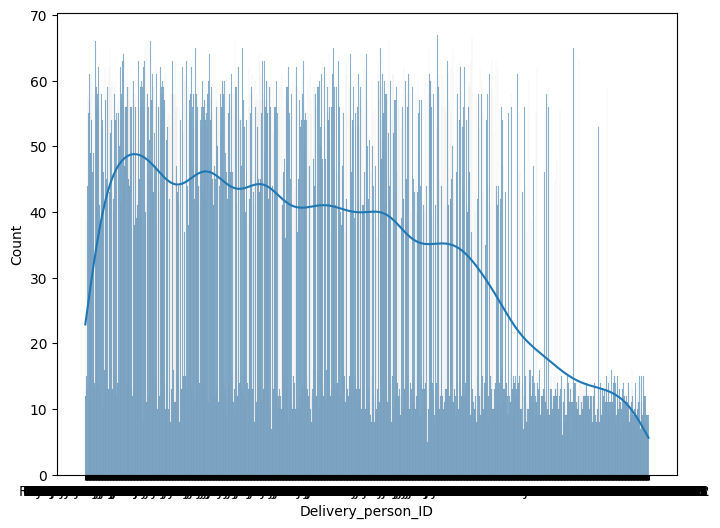

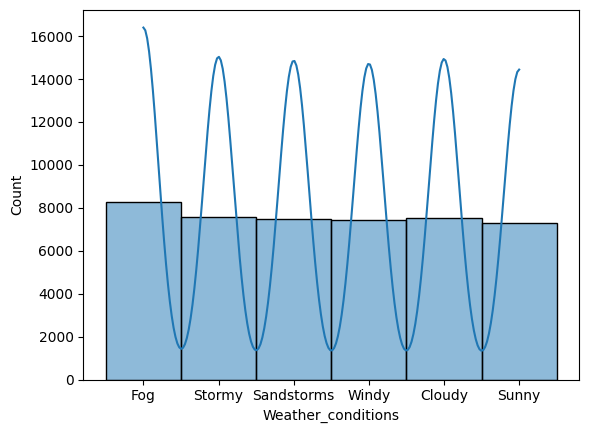

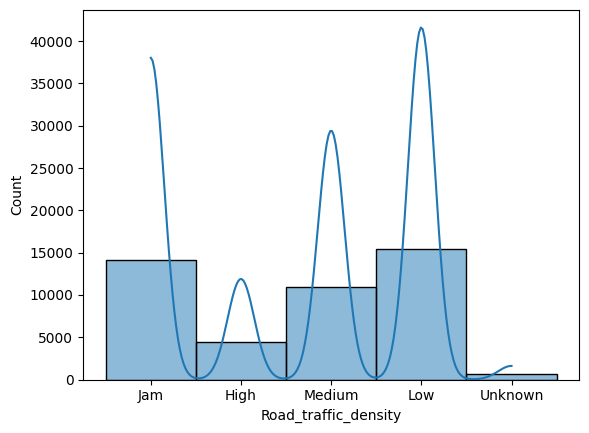

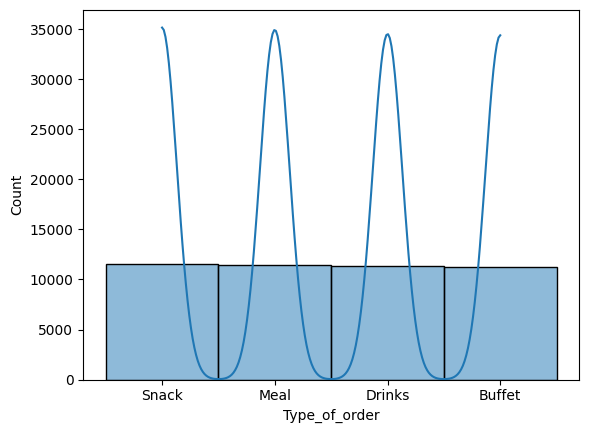

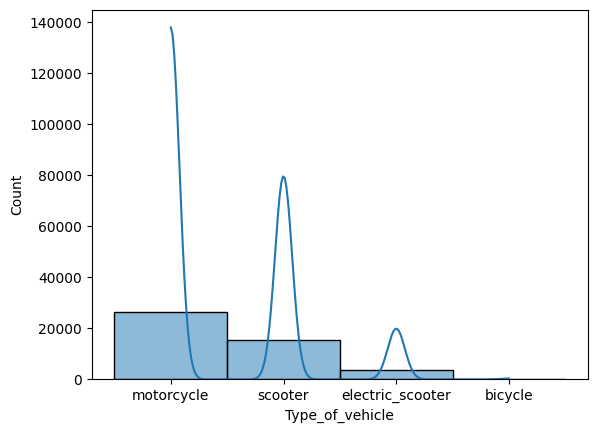

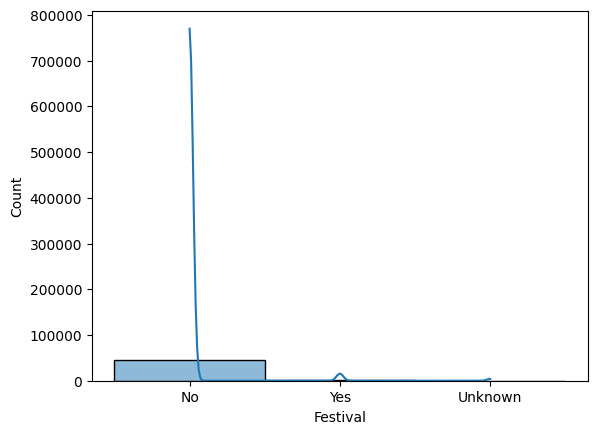

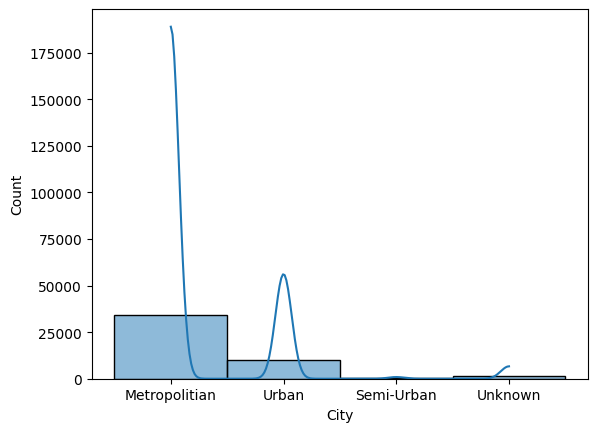

In [196]:
# lets check data distribution for categorical columns
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in categorical_columns:
    sns.histplot(data=df1,x=i,kde=True)
    print('\n')
    plt.show()


<Axes: >

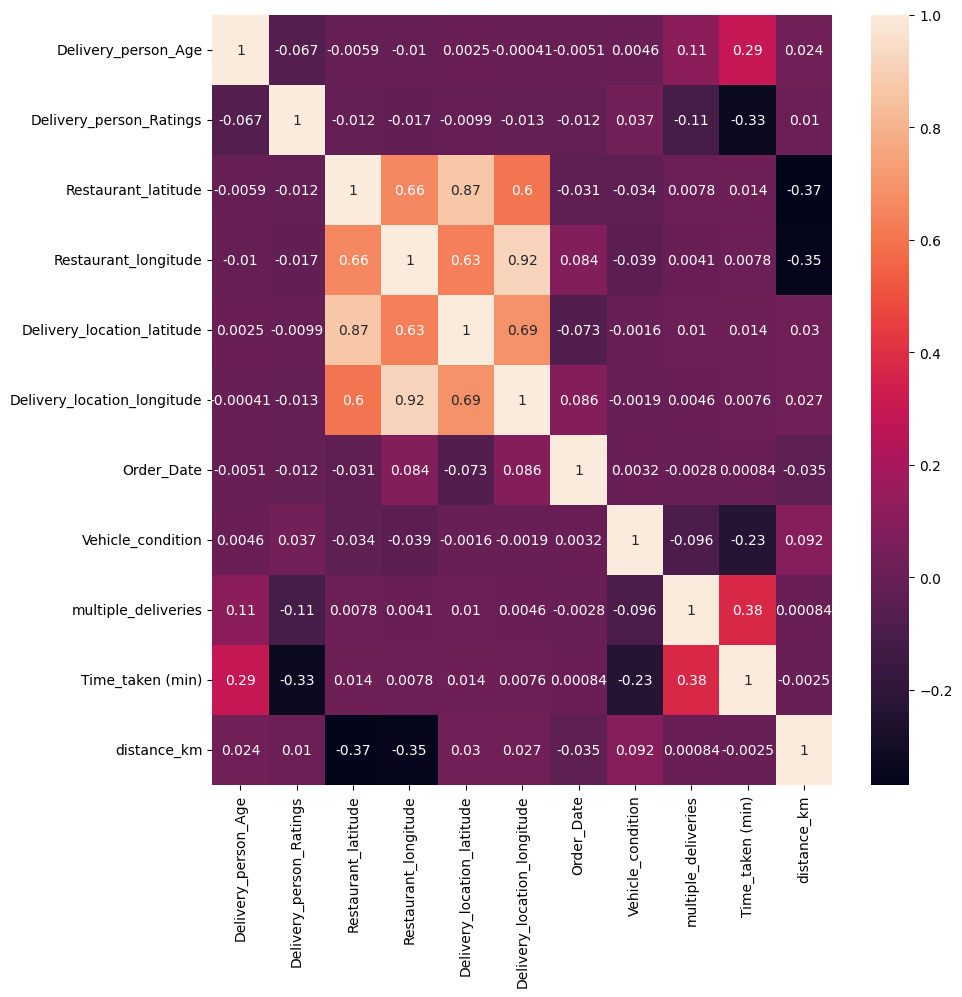

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sns.heatmap(df1[numerical_columns].corr(),annot=True)

In [202]:
df1.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Vehicle_condition,multiple_deliveries,Time_taken (min),distance_km
count,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584,45584.000000,45584.000000,45584.000000,45584.000000
mean,29.584525,4.636546,17.017948,70.229684,17.465480,70.844161,2022-03-13 16:31:17.711477760,1.023385,0.750197,26.293963,99.216357
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,2022-02-11 00:00:00,0.000000,0.000000,10.000000,1.460000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,2022-03-04 00:00:00,0.000000,0.000000,19.000000,4.650000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,2022-03-15 00:00:00,1.000000,1.000000,26.000000,9.250000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,2022-03-27 00:00:00,2.000000,1.000000,32.000000,13.740000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,2022-04-06 00:00:00,3.000000,3.000000,54.000000,19709.580000
std,5.696221,0.327931,8.185674,22.885575,7.335562,21.120578,NaN,0.839055,0.567465,9.384298,1100.033056


## Model training

In [215]:
df1.drop('Delivery_person_ID',axis=1,inplace=True)


In [214]:
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_km
0,36,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.27
1,21,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.23
2,23,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.76
3,34,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.93
4,24,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.37


In [269]:
df1['Weather_conditions']=df1['Weather_conditions'].astype('object')
df1['Road_traffic_density']=df1['Road_traffic_density'].astype('object')
df1['Type_of_order']=df1['Type_of_order'].astype('object')
df1['Festival']=df1['Festival'].astype('object')
df1['City']=df1['City'].astype('object')
df1['Type_of_vehicle']=df1['Type_of_vehicle'].astype('object')

In [270]:
X = df1.drop(labels=['Time_taken (min)'],axis=1)
Y = df1['Time_taken (min)']

In [271]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_Age          45584 non-null  int32         
 1   Delivery_person_Ratings      45584 non-null  float64       
 2   Restaurant_latitude          45584 non-null  float64       
 3   Restaurant_longitude         45584 non-null  float64       
 4   Delivery_location_latitude   45584 non-null  float64       
 5   Delivery_location_longitude  45584 non-null  float64       
 6   Order_Date                   45584 non-null  datetime64[ns]
 7   Weather_conditions           45584 non-null  object        
 8   Road_traffic_density         45584 non-null  object        
 9   Vehicle_condition            45584 non-null  int64         
 10  Type_of_order                45584 non-null  object        
 11  Type_of_vehicle              45584 non-nu

In [272]:
Y.head()

0    46
1    23
2    21
3    20
4    41
Name: Time_taken (min), dtype: int64

In [273]:
# segregating into numerical and categorical columns
categorical_columns = X.select_dtypes(include='object').columns
numerical_columns = X.select_dtypes(exclude='object').columns
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Vehicle_condition',
       'multiple_deliveries', 'distance_km'],
      dtype='object')
Categorical Columns: Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')


In [274]:
df1['City'].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban', 'Unknown'], dtype=object)

In [275]:
# Define the custom ranking for each ordinal variable
weather_categories=['sunny','Windy','Cloudy','Fog','Stormy','Sandstorms']
road_traffic_categories=['Low','Unknown','Medium','High','Jam']
order_categories=['Drinks','Snack','Meal','Buffet']
vehicle_categories=['bicycle','electric_scooter','scooter','motorcycle']
festival_categories=['No','Unknown','Yes']
city_categories=['Semi-Urban','Urban','Unknown','Metropolitian']


In [276]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [277]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[weather_categories,road_traffic_categories,order_categories,vehicle_categories,festival_categories,city_categories])),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_columns),
('cat_pipeline',cat_pipeline,categorical_columns)
])

In [278]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [279]:
X_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,distance_km
5755,36,4.1,22.310329,73.169083,22.380329,73.239083,2022-03-02,Sandstorms,Jam,0,Buffet,motorcycle,0.0,No,Metropolitian,10.59
9163,29,3.6,22.310526,73.170937,22.370526,73.230937,2022-03-19,Sunny,Jam,0,Buffet,motorcycle,3.0,Yes,Urban,9.07
16410,31,4.8,26.473698,80.352677,26.493698,80.372677,2022-02-15,Windy,Low,2,Meal,scooter,1.0,No,Metropolitian,2.98
36945,33,4.2,15.157944,73.950889,15.287944,74.080889,2022-02-14,Windy,Jam,2,Meal,scooter,1.0,No,Metropolitian,20.05
14679,34,4.1,19.126630,72.829976,19.146630,72.849976,2022-03-09,Windy,Low,0,Meal,motorcycle,1.0,No,Urban,3.05


In [280]:
X_test.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,distance_km
10074,30,4.8,12.972532,77.608179,13.102532,77.738179,2022-03-20,Sandstorms,Jam,1,Snack,scooter,1.0,No,Metropolitian,20.14
12570,24,5.0,26.913483,75.803139,26.973483,75.863139,2022-03-21,Cloudy,Medium,0,Meal,motorcycle,1.0,No,Metropolitian,8.93
34085,28,4.6,22.761593,75.886362,22.891593,76.016362,2022-03-02,Windy,Medium,2,Snack,electric_scooter,0.0,No,Metropolitian,19.63
30952,26,4.5,19.126630,72.829976,19.176630,72.879976,2022-03-07,Sunny,Medium,1,Snack,motorcycle,0.0,No,Metropolitian,7.64
15574,30,4.7,22.750040,75.902847,22.820040,75.972847,2022-04-06,Fog,Jam,2,Buffet,electric_scooter,1.0,No,Metropolitian,10.57


In [281]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

TypeError: The DType <class 'numpy.dtype[float64]'> could not be promoted by <class 'numpy.dtype[datetime64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[int32]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>)

In [ ]:
X_train.head()

In [ ]:
## Model Training

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error